<a href="https://colab.research.google.com/github/bhopchi/brain_tumor_MRI/blob/main/diabetes_health_indicator_in_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# diabetes health indicator in patients

In [5]:
!pip install ucimlrepo # Install the ucimlrepo package using pip.
from ucimlrepo import fetch_ucirepo # Import the fetch_ucirepo function after installing the package.
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [7]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [8]:
print(X.info())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [9]:
X.isnull().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


# Distribution of Age

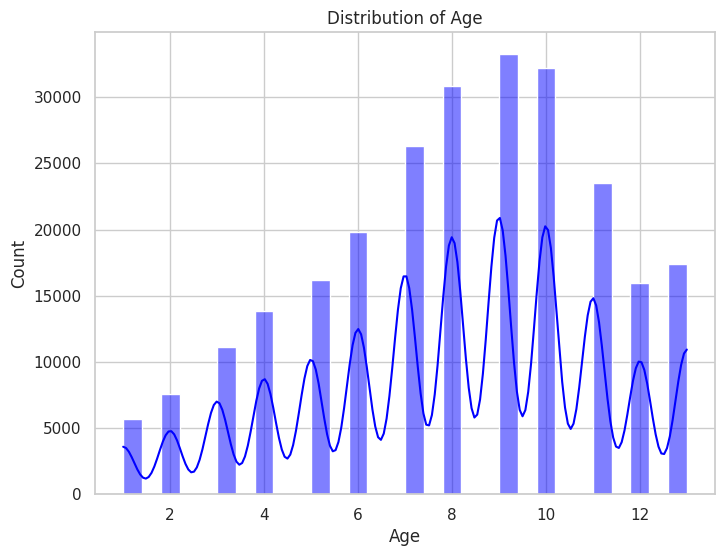

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(X['Age'], kde=True, bins=30, color='blue')
plt.title("Distribution of Age")
plt.show()

# Percentage of smokers

In [11]:
smoker_percentage = X['Smoker'].mean() * 100
print(f"Percentage of smokers: {smoker_percentage:.2f}%")

Percentage of smokers: 44.32%


# Relationship between Smoker and Stroke

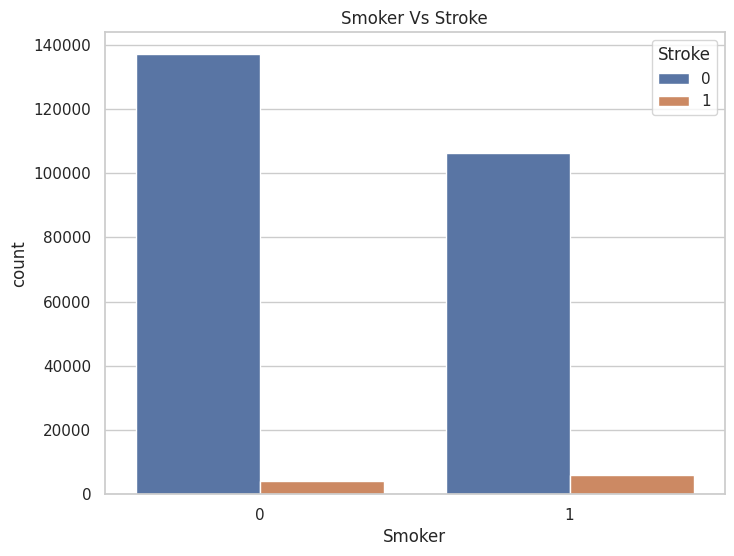

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoker', hue='Stroke', data=X)
plt.title("Smoker Vs Stroke")
plt.show()

# High blood pressure and stroke relationship

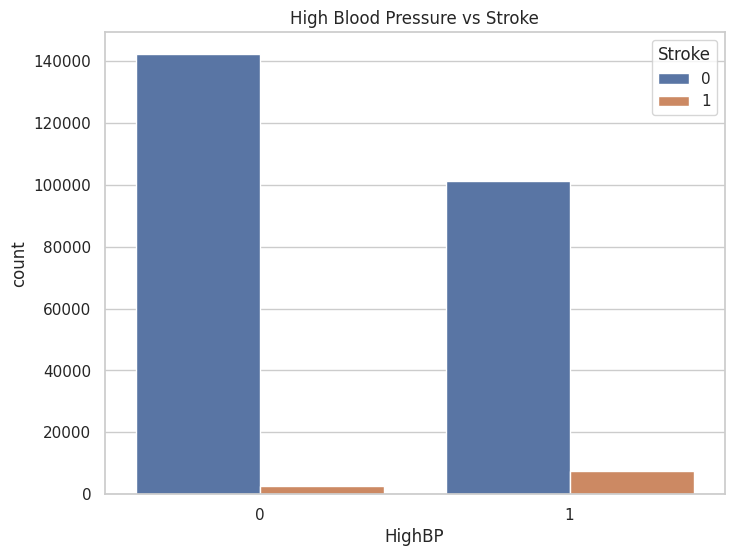

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Stroke', data=X)
plt.title('High Blood Pressure vs Stroke')
plt.show()

# Income relationship with GenHlth, PhysHlth and MenHlth

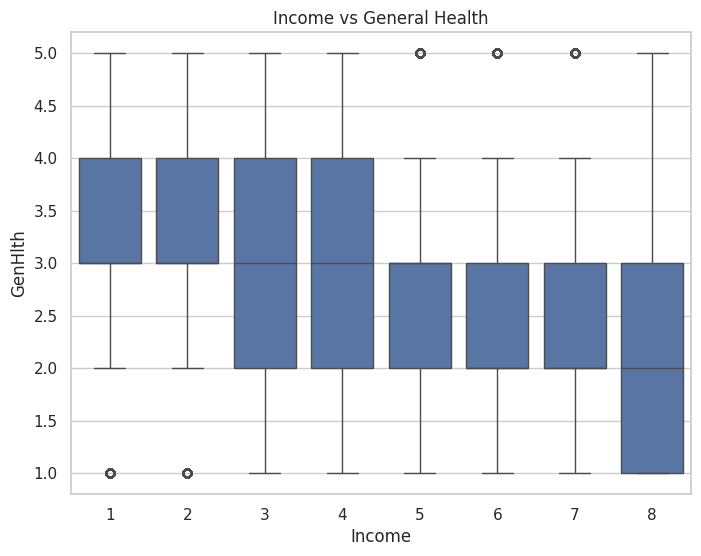

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', y='GenHlth', data=X)
plt.title('Income vs General Health')
plt.show()

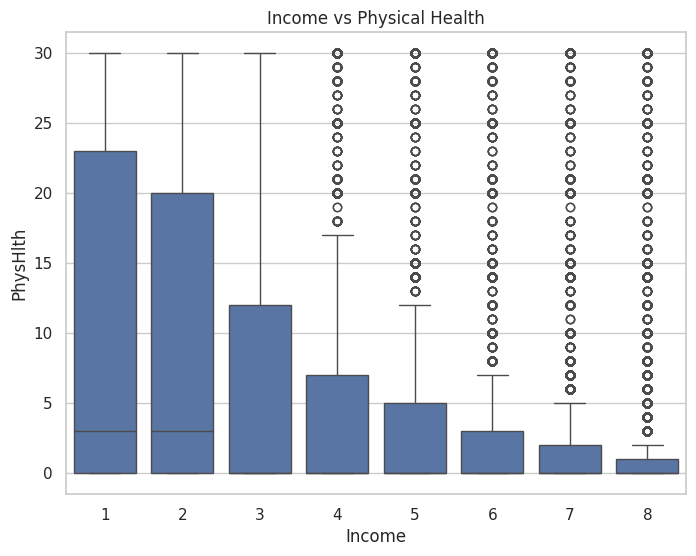

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', y='PhysHlth', data=X)
plt.title('Income vs Physical Health')
plt.show()

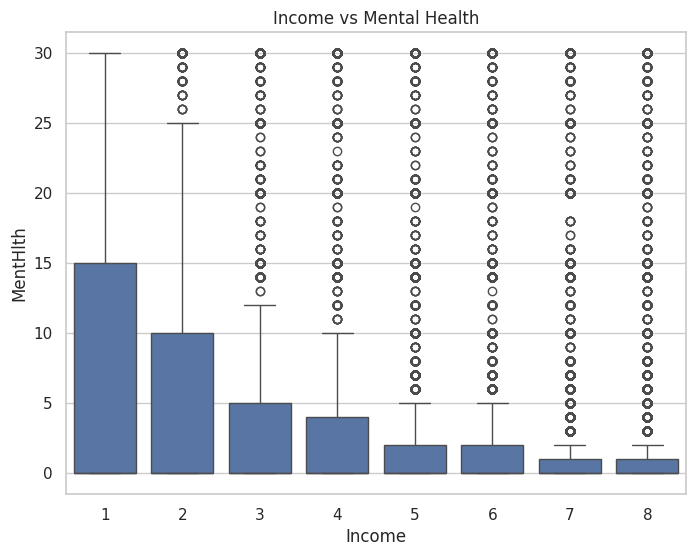

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', y='MentHlth', data=X)
plt.title('Income vs Mental Health')
plt.show()

# Gender distribution for people with heart disease or stroke (0 = female, 1 = male)

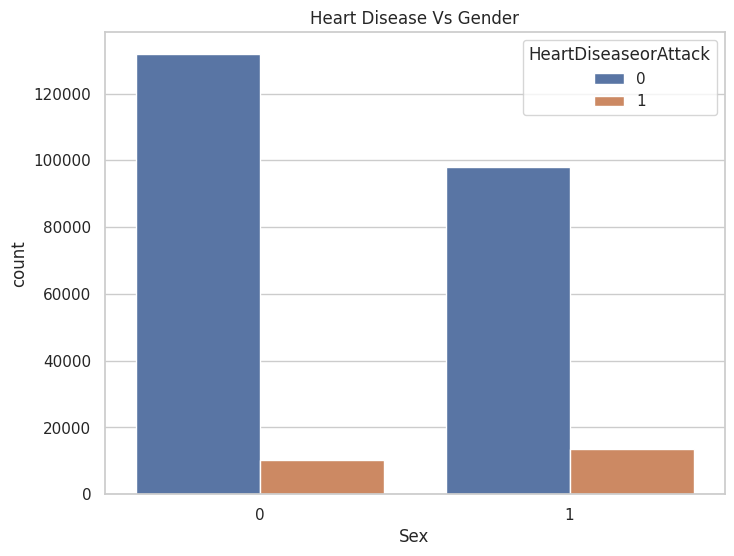

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=X)
plt.title("Heart Disease Vs Gender")
plt.show()

# Relationship between PhysActivity and HeartDiseaseorAttack

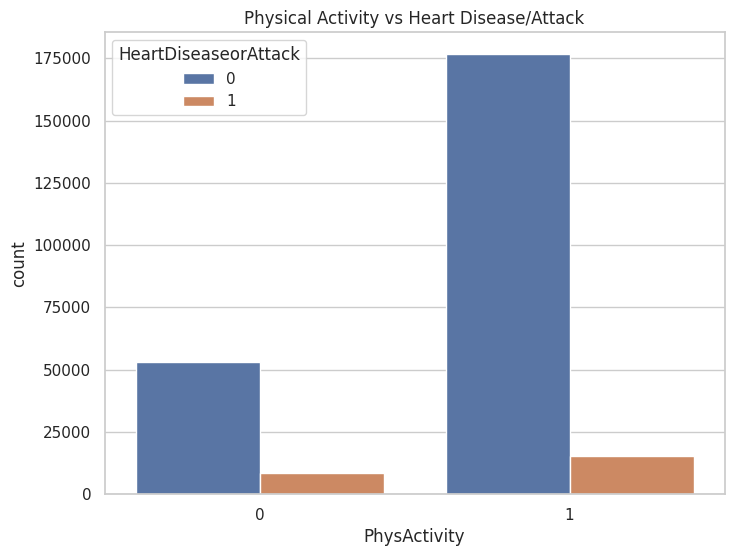

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhysActivity', hue='HeartDiseaseorAttack', data=X)
plt.title('Physical Activity vs Heart Disease/Attack')
plt.show()

In [19]:
df = X.copy()
df['Diabetes_binary'] = y
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


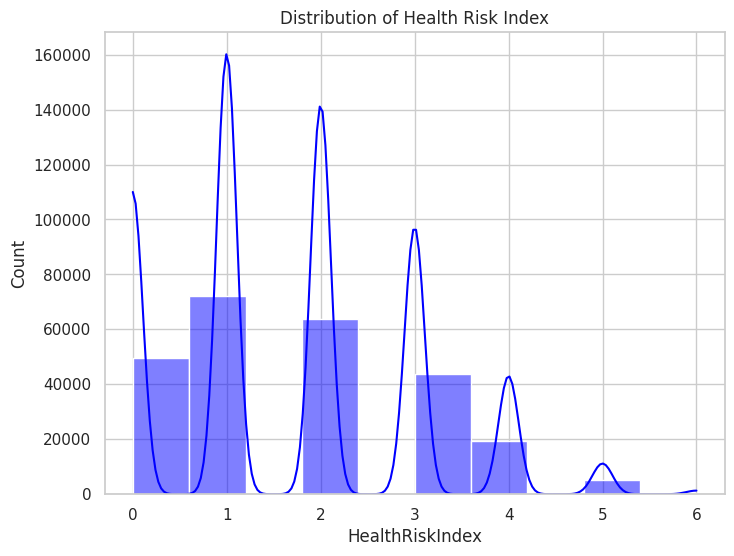

In [20]:
df['HealthRiskIndex'] = (df['HighBP'] + df['HighChol'] + (df['BMI'] > 30).astype(int) +
                          df['Smoker'] + df['Stroke'] +
                          df['HeartDiseaseorAttack'])
# Distribution of Health Risk Index
plt.figure(figsize=(8, 6))
sns.histplot(df['HealthRiskIndex'], kde=True, bins=10, color='blue')
plt.title('Distribution of Health Risk Index')
plt.show()

# Visualization of the cumulative health burden

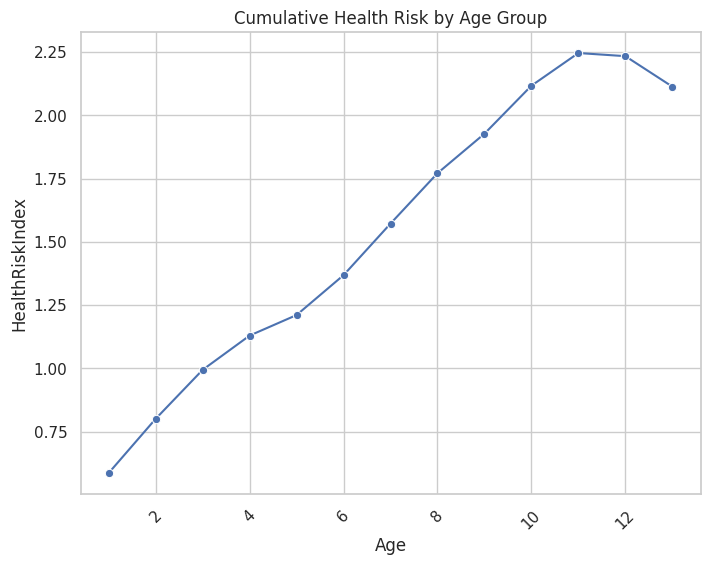

0

In [21]:
age_group_risk = df.groupby('Age')['HealthRiskIndex'].mean().reset_index()
# Plot cumulative health burden over age categories
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='HealthRiskIndex', data=age_group_risk, marker="o")
plt.title('Cumulative Health Risk by Age Group')
plt.xticks(rotation=45)
plt.show()
0

# Lifestyle and Health risk correlation

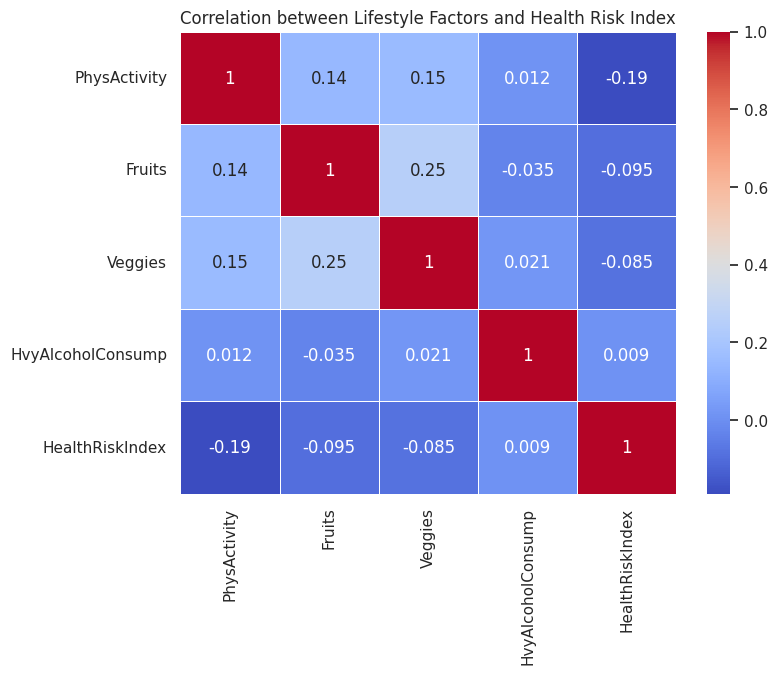

In [22]:
lifestyle_factors = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HealthRiskIndex']
lifestyle_corr = df[lifestyle_factors].corr()
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lifestyle_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Lifestyle Factors and Health Risk Index')
plt.show()

# Conditional Probability for Health Events

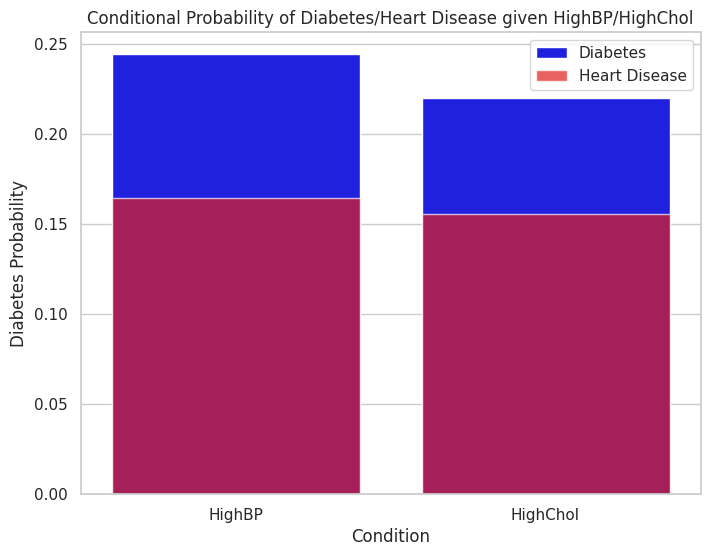

In [23]:
# Probability of diabetes given HighBP and HighChol
prob_diabetes_highbp = df[df['HighBP'] == 1]['Diabetes_binary'].mean()
prob_diabetes_highchol = df[df['HighChol'] == 1]['Diabetes_binary'].mean()
# Probability of heart disease given HighBP and HighChol
prob_heart_highbp = df[df['HighBP'] == 1]['HeartDiseaseorAttack'].mean()
prob_heart_highchol = df[df['HighChol'] == 1]['HeartDiseaseorAttack'].mean()
# Creating a summary Dataframe
conditional_prob = pd.DataFrame({
    'Condition': ['HighBP', 'HighChol'],
    'Diabetes Probability': [prob_diabetes_highbp, prob_diabetes_highchol],
    'Heart Disease Probability': [prob_heart_highbp, prob_heart_highchol]
})
# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(x='Condition', y='Diabetes Probability', data=conditional_prob, color='blue', label='Diabetes')
sns.barplot(x='Condition', y='Heart Disease Probability', data=conditional_prob, color='red', label='Heart Disease', alpha=0.7)
plt.title('Conditional Probability of Diabetes/Heart Disease given HighBP/HighChol')
plt.legend()
plt.show()

# Pairwise Comparison of Key Health Indicators

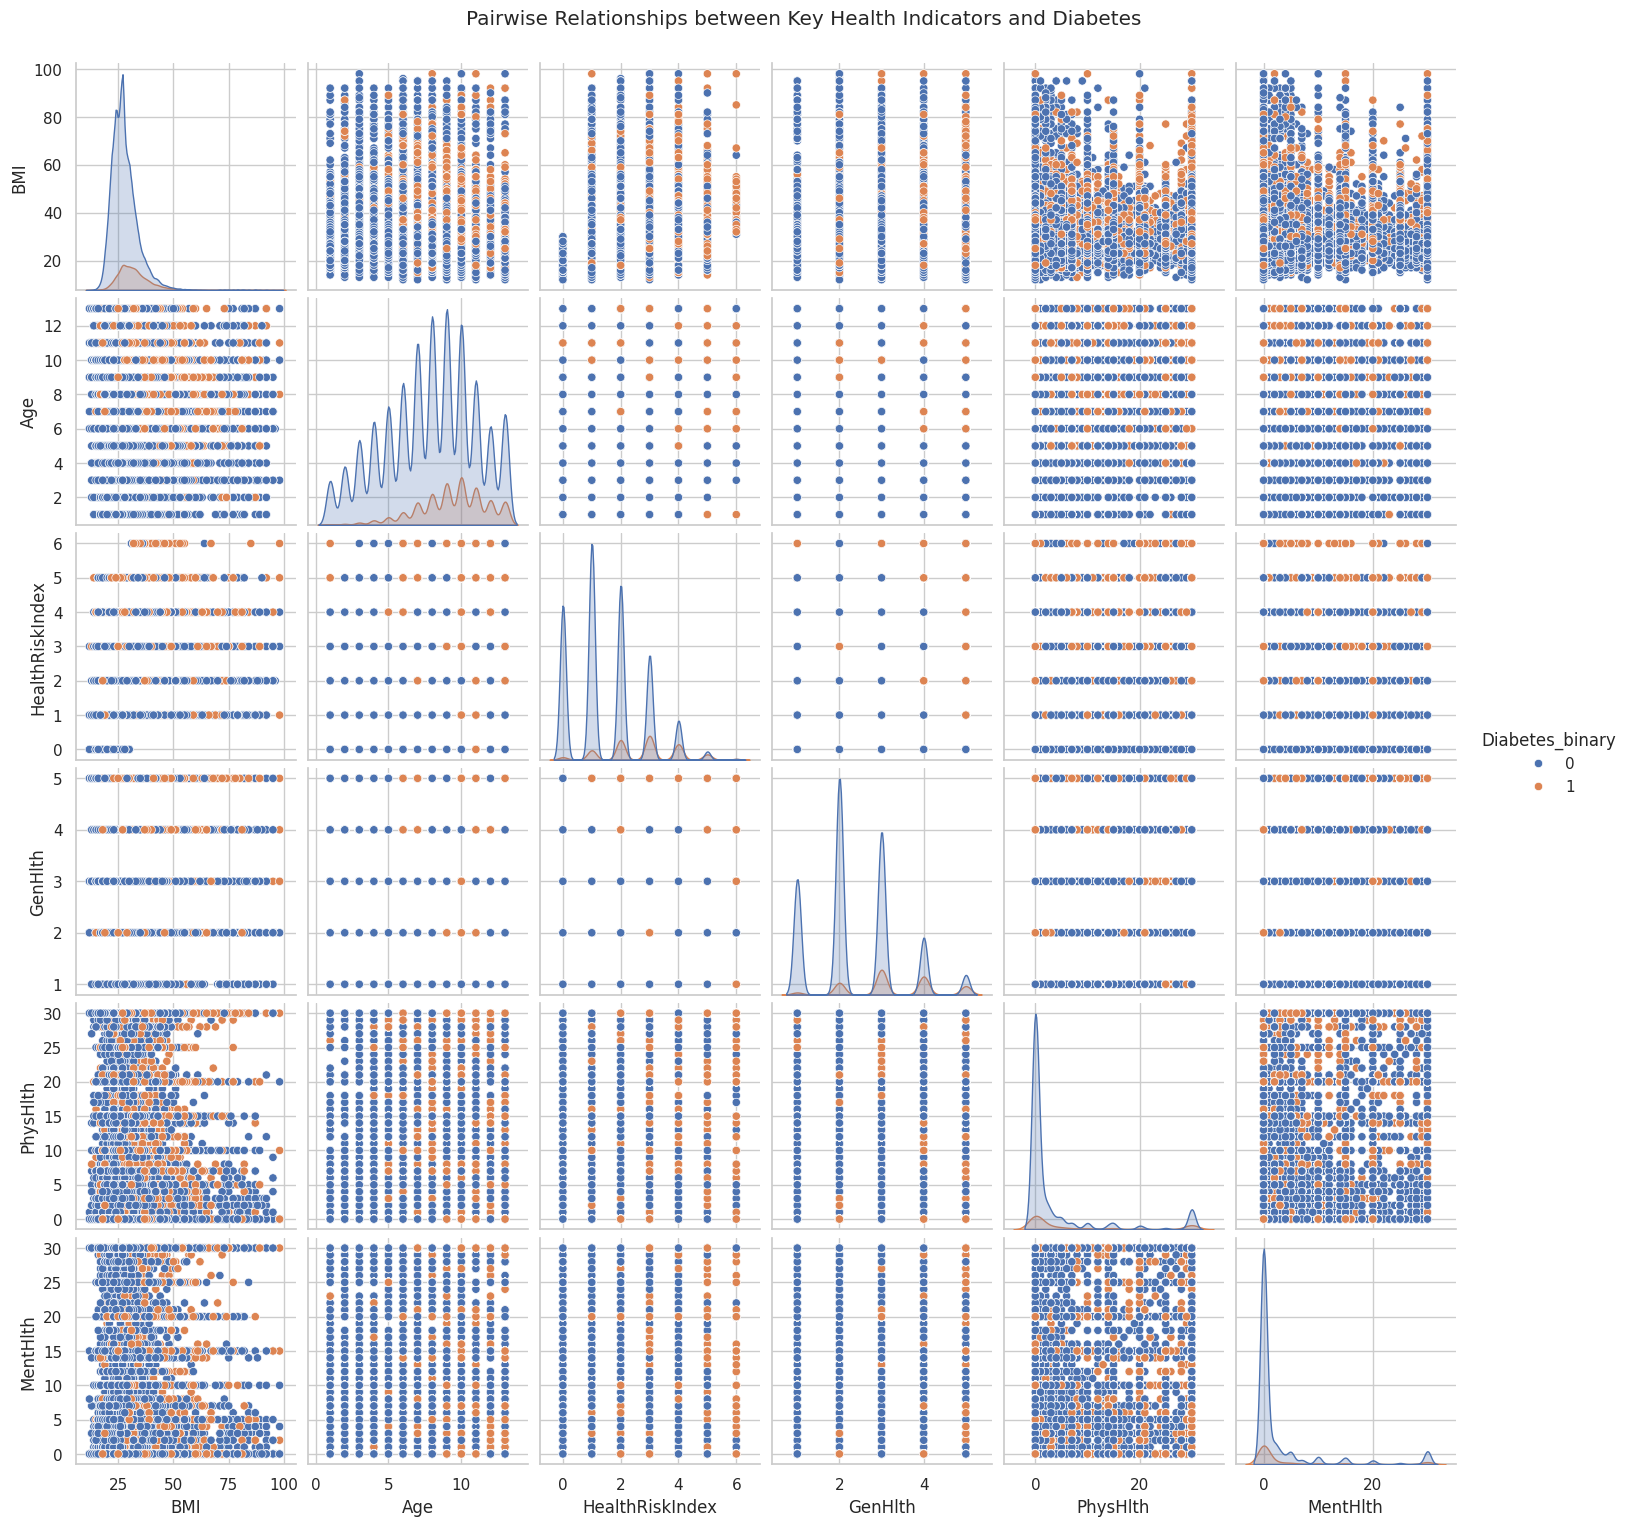

In [24]:
sns.pairplot(df[['BMI', 'Age', 'HealthRiskIndex', 'GenHlth', 'PhysHlth', 'MentHlth', 'Diabetes_binary']], diag_kind='kde', hue='Diabetes_binary')
plt.suptitle('Pairwise Relationships between Key Health Indicators and Diabetes', y=1.02)
plt.show()

# Feature Selection

In [25]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


<Axes: title={'center': 'Correlation with Diabetes_binary'}>

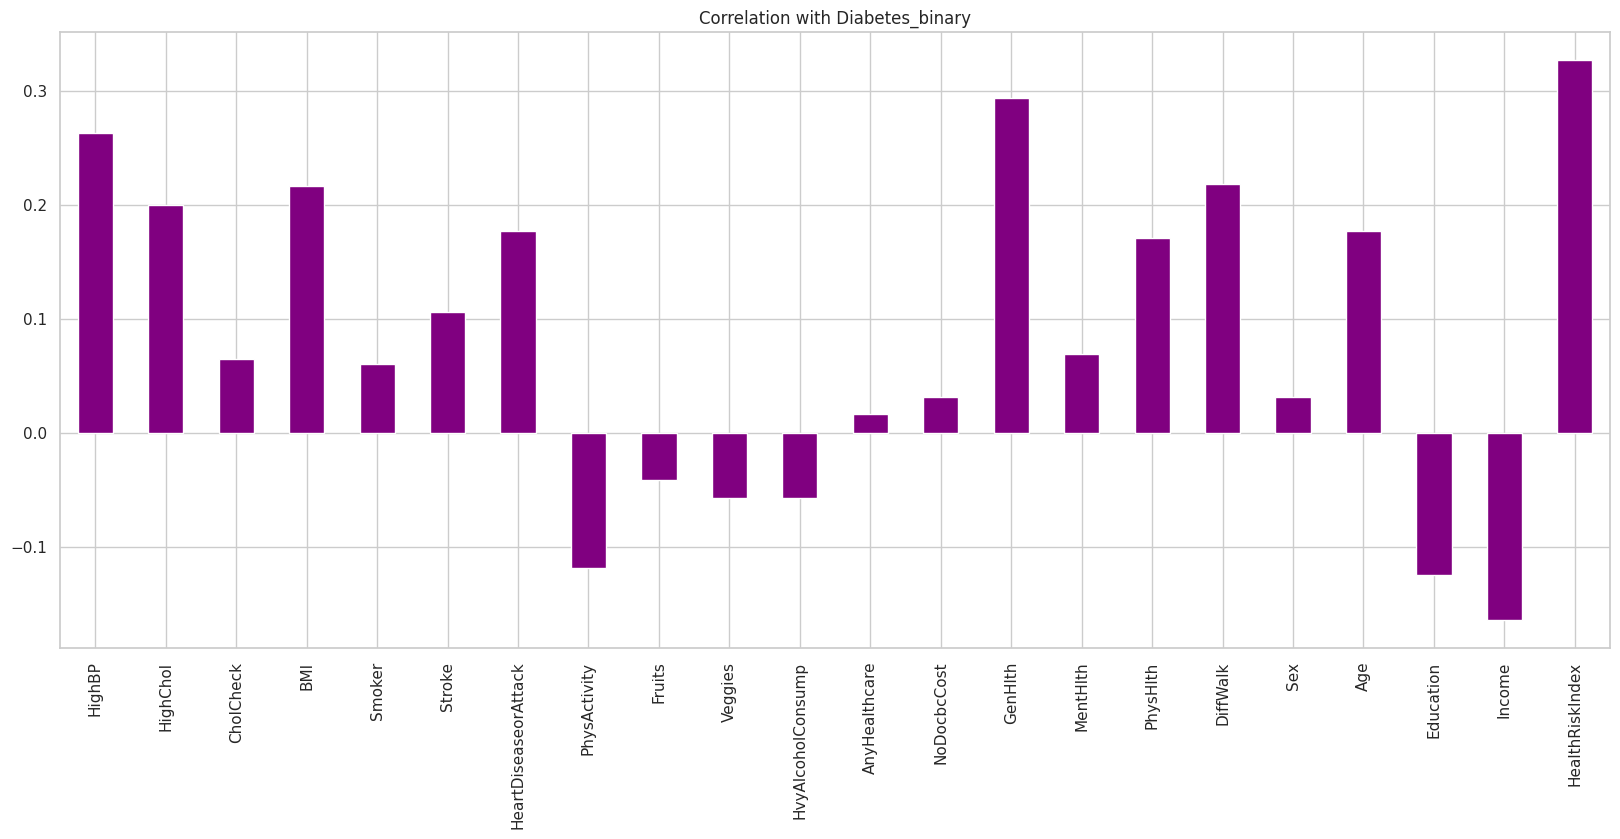

In [26]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary", color="Purple")

In [27]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [28]:
# List of columns to drop (original columns and IDs)
columns_to_drop = ["Fruits", "Veggies", "Sex", "CholCheck", "AnyHealthcare", "NoDocbcCost"]
# Dropping the unnecessary columns
X_cleaned = X.drop(columns=columns_to_drop, axis=1)

In [29]:
X_cleaned.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')

In [31]:
import pandas as pd  # Import the pandas library with the alias 'pd'

X_cleaned['Income_Binned'] = pd.cut(X_cleaned['Income'], bins=[0, 3, 5, 8, 14], labels=['Low', 'Middle', 'High',"very high"])

In [32]:
X_cleaned['Age_LifeStage'] = pd.cut(X_cleaned['Age'], bins=[0, 3, 6, 9, 13],
labels=['Young Adult (18-34)', 'Adult (35-49)',
'Middle-aged (50-64)', 'Senior (65+)'])

In [33]:
BMI_upper_limit = 50
# Cap BMI values above the upper limit
X_cleaned['BMI_Capped'] = X_cleaned['BMI'].apply(lambda x: BMI_upper_limit if x > BMI_upper_limit else x)
# Create BMI categories based on standard ranges
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
X_cleaned['BMI_Category'] = X_cleaned['BMI_Capped'].apply(bmi_category)

In [34]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal features
label_enc_income = LabelEncoder()
label_enc_age = LabelEncoder()

# Correctly apply fit_transform to the ordinal features
X_cleaned['Income_Binned_Label'] = label_enc_income.fit_transform(X_cleaned['Income_Binned'])
X_cleaned['Age_LifeStage_Label'] = label_enc_age.fit_transform(X_cleaned['Age_LifeStage'])

In [35]:
X_cleaned = pd.get_dummies(X_cleaned, columns=['BMI_Category'], drop_first=True)

In [36]:
X_cleaned.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Age', 'Education', 'Income', 'Income_Binned',
       'Age_LifeStage', 'BMI_Capped', 'Income_Binned_Label',
       'Age_LifeStage_Label', 'BMI_Category_Obese', 'BMI_Category_Overweight',
       'BMI_Category_Underweight'],
      dtype='object')

In [37]:
# List of columns to drop (original columns and IDs)
columns_to_drop = ['Income', 'Age', 'BMI', 'Income_Binned', 'Age_LifeStage', 'BMI_Capped']
# Dropping the unnecessary columns
X_cleaned = X_cleaned.drop(columns=columns_to_drop, axis=1, errors='ignore')
# Display the remaining columns


In [38]:
print(X_cleaned.columns)

Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Education', 'Income_Binned_Label', 'Age_LifeStage_Label',
       'BMI_Category_Obese', 'BMI_Category_Overweight',
       'BMI_Category_Underweight'],
      dtype='object')


In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [41]:
y = df['Diabetes_binary']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42, stratify=y)

# Handle the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

In [43]:
def plot_class_dist(y, title):
    class_cnts = y.value_counts()
    sns.barplot(x=class_cnts.index, y=class_cnts.values)  # Changed to class_cnts.index
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('Class')
    plt.show()

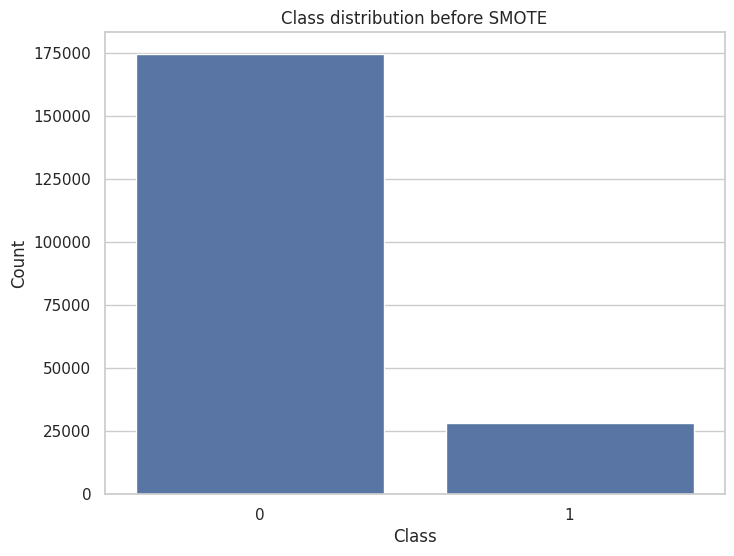

In [44]:
# Plot before applying SMOTE
plt.figure(figsize=(8, 6))
plot_class_dist(y_train, 'Class distribution before SMOTE')

In [46]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

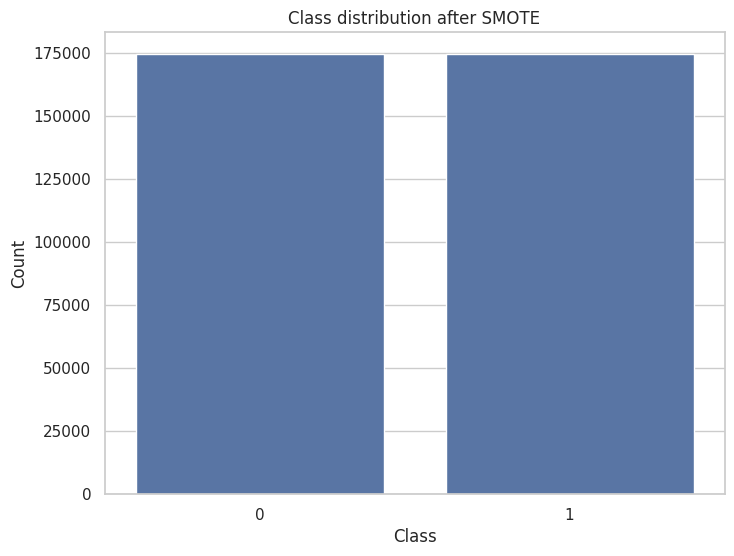

In [47]:
# Plot after applying SMOTE
plt.figure(figsize=(8, 6))
plot_class_dist(y_train_smote, 'Class distribution after SMOTE')

# Find the best model using different classifiers and evaluate them using the necessary metrics

In [49]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
# Initialize different classifiers with adjusted hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1500, random_state=42, solver='saga'),  # solver='saga' for larger datasets or multinomial cases
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),  # n_estimators set to 100
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),  # max_depth set to 5 to avoid overfitting
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)  # n_estimators set to 100
}

In [52]:
# Initialize an empty list to store results
results_list = []

for name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate required metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    # Append the results to the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# Sort by F1-score or another metric of your choice
results = results.sort_values(by='F1-Score', ascending=False)

# Display the results
print(results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.717518   0.295189  0.740416  0.422097  0.796467
3    Gradient Boosting  0.698675   0.286019  0.777055  0.418132  0.805289
2        Decision Tree  0.706816   0.287696  0.748196  0.415590  0.786307
1        Random Forest  0.739771   0.278139  0.543924  0.368066  0.733290


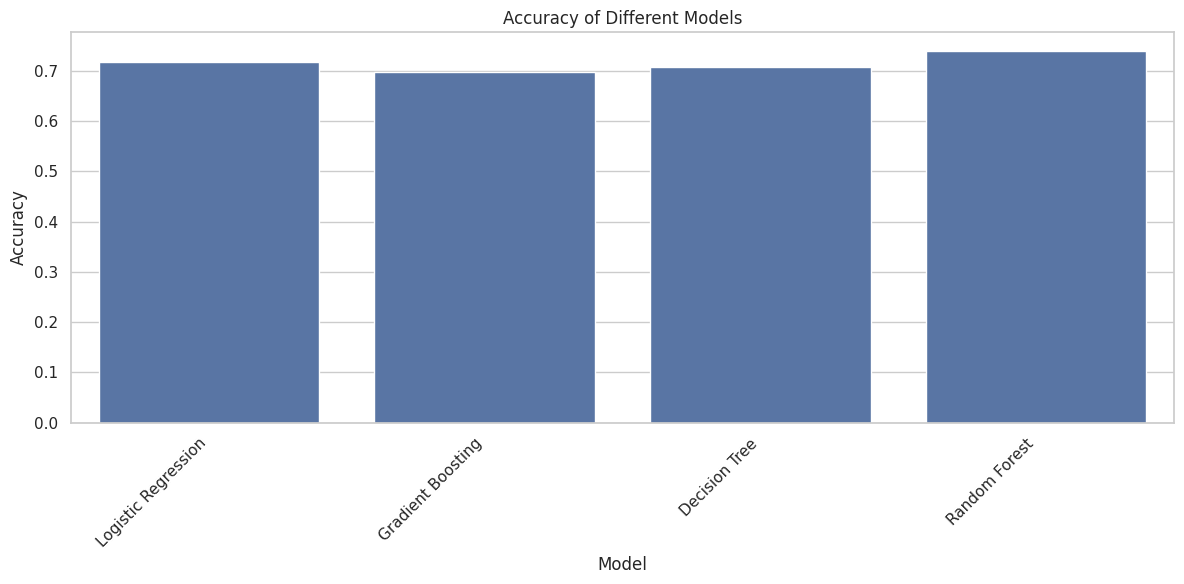

In [53]:
# Plotting the model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results)  # Swap x and y
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')  # Swap xlabel and ylabel
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Undersampling with the NearMiss technique

In [54]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


In [55]:
from imblearn.under_sampling import NearMiss

# Instantiate NearMiss with correct parameters
nearmiss = NearMiss(version=1, n_neighbors=3)  # Changed n_neighbors to 3 (default)

# Resample the dataset
X_nm, y_nm = nearmiss.fit_resample(X_cleaned, y)

In [56]:
# Check the shapes of the resampled data
print(y_nm.shape, X_nm.shape)

(70692,) (70692, 17)


In [59]:
# Import necessary modules and functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming X_nm and y_nm are your feature and target arrays
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.2, random_state=42)

# Initialize an empty list to store results
results_list = []

# Iterate over each model in the models dictionary
for name, model in models.items():
    # Train the model
    model.fit(X_train_nm, y_train_nm)

    # Predict on the test set
    y_pred = model.predict(X_test_nm)

    # Calculate required metrics
    accuracy = accuracy_score(y_test_nm, y_pred)
    precision = precision_score(y_test_nm, y_pred)
    recall = recall_score(y_test_nm, y_pred)
    f1 = f1_score(y_test_nm, y_pred)
    roc_auc = roc_auc_score(y_test_nm, model.predict_proba(X_test_nm)[:,1])

    # Append the results to the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# Sort by F1-score or another metric of your choice
results = results.sort_values(by='F1-Score', ascending=False) # Changed to F1-Score for consistency

# Print the results
print(results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1        Random Forest  0.878138   0.946662  0.800681  0.867574  0.938828
3    Gradient Boosting  0.864064   0.913401  0.803518  0.854943  0.936441
2        Decision Tree  0.834571   0.866480  0.789899  0.826419  0.907316
0  Logistic Regression  0.836127   0.884091  0.772592  0.824589  0.917502


In [62]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, 40, None],
    'max_features': ['sqrt', 'log2', 'auto'],  # Replace None with 'auto'
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Random search with 3-fold cross-validation
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the random search model
random_search_rf.fit(X_train_nm, y_train_nm)

# Print the best parameters found
print("Best parameters found: ", random_search_rf.best_params_)

# Evaluate the best model on the test set
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_nm)

# Classification report
print(classification_report(y_test_nm, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line

Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7090
           1       0.95      0.79      0.87      7049

    accuracy                           0.88     14139
   macro avg       0.89      0.88      0.88     14139
weighted avg       0.89      0.88      0.88     14139



After the hyperparameter tuning had been performed using `RandomizedSearchCV, no significant improvement of the accuracy of the model was achieved. The reasons for this may be summarized as follows:

1. **Model Stability**: The Random Forest model might have already been operating close to their best capacity with the set default or previously obtained hyperparameters, indicating that further modifications did not lead to a notable improvement.

2. **Properties of the Data**: There could be properties of the features in the dataset that were so well aligned with the algorithm Random Forest that no optimisation of the hyperparameters appeared to benefit accuracy much.

3. **Overfitting Check**: Some of the hyperparameters - like higher values for `min_samples_split` or `min_samples_leaf` - would have been part of the tweaked tuning that had been set in order to avoid overfitting. These controls help to not overfit but are detrimental in that they retain the same level of accuracy or lower it by a little noticeably.

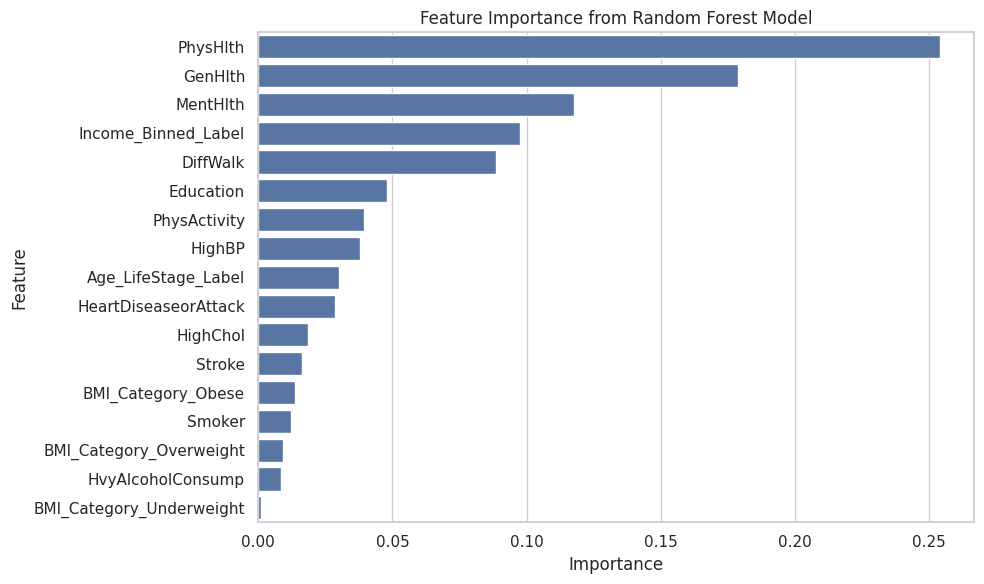

In [63]:
 # Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming best_rf is already trained and defined
# Get feature importance from the best model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X_train_nm.columns,
    'Importance': feature_importances
})

# Sort the feature importances
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Save the model with versioning

In [68]:
import pickle
# Define the version for the model
version = "1.0"
model_filename = f'PK_model_diabetes'
# Save the best model with versioning
with open(model_filename, 'wb') as model_file:
    # Indent this line to be within the 'with' block
    pickle.dump(best_rf, model_file)
print(f"Model saved successfully as {model_filename}!")

Model saved successfully as PK_model_diabetes!


A 300 MB model is relatively large, especially for deployment in environments with
limited storage or memory constraints. I used Joblib Compression to reduce the model
size without sacrificing too much performance.

# Retrieve the our model

In [69]:
import joblib
joblib.dump(best_rf, 'PK_model_diabetes', compress=3)

['PK_model_diabetes']